In [1]:
import wandb

wandb.login(key='b123af3ff1bc7e54569d0976c6405a5b3b6d2902')

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words("russian")

import re

from tqdm import tqdm

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def preprocess_text(text):
    """
    Preprocess text to retain only alphabetic characters and convert to lowercase.
    
    Parameters:
        text (str): Input string.
        
    Returns:
        str: Preprocessed string.
    """
    text = re.sub(r",", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = text.lower()
    return text


def all_preprocessing(df):
    df['words'] = df['text'].apply(preprocess_text).apply(lambda x:  x.split(' '))
    df['label'] = df['label'].apply(lambda x:  str(x).split(','))
    return df

In [ ]:
df = pd.read_csv('/kaggle/input/wildberries-winter-school-24-contest-detected/train.csv', index_col='ID')
df = all_preprocessing(df)
df.tail()

Каждое "слово" отметим маркером 0/1 является ли оно матом. Когда будем предсказывать входные слова на предмет мата, также будем отмечать их 0/1. Если они идут подряд, будем брать их при инференсе в единое "словосочетание мата" (или не стоит?), если нет, то будем перечеслять через запятую.

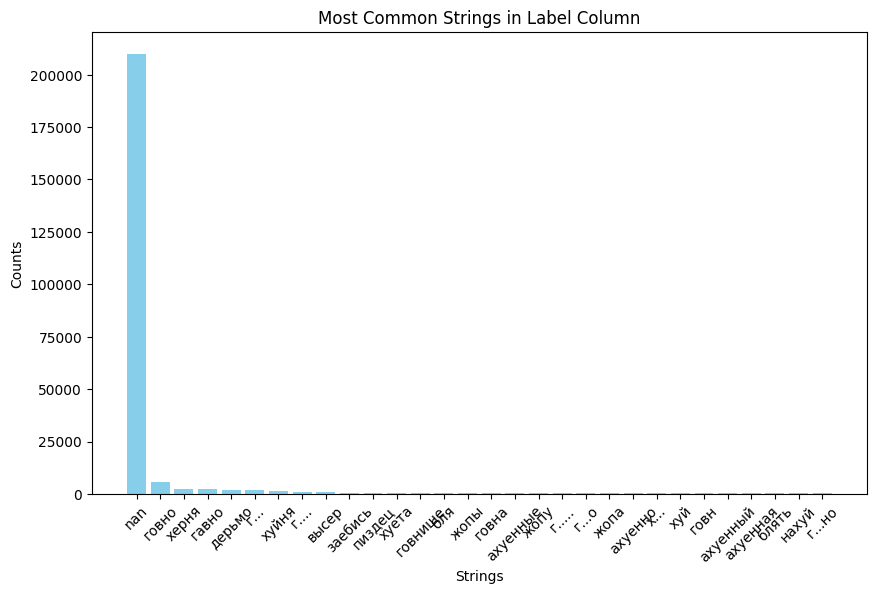

In [22]:
import matplotlib.pyplot as plt
from collections import Counter


# Flatten the "label" column and count occurrences
all_labels = [item for sublist in df["label"] for item in sublist]
label_counts = Counter(all_labels)

# Convert to a DataFrame for visualization
label_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False).head(30)

# Plot the most common labels
plt.figure(figsize=(10, 6))
plt.bar(label_df["Label"], label_df["Count"], color='skyblue')
plt.title("Most Common Strings in Label Column")
plt.xlabel("Strings")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

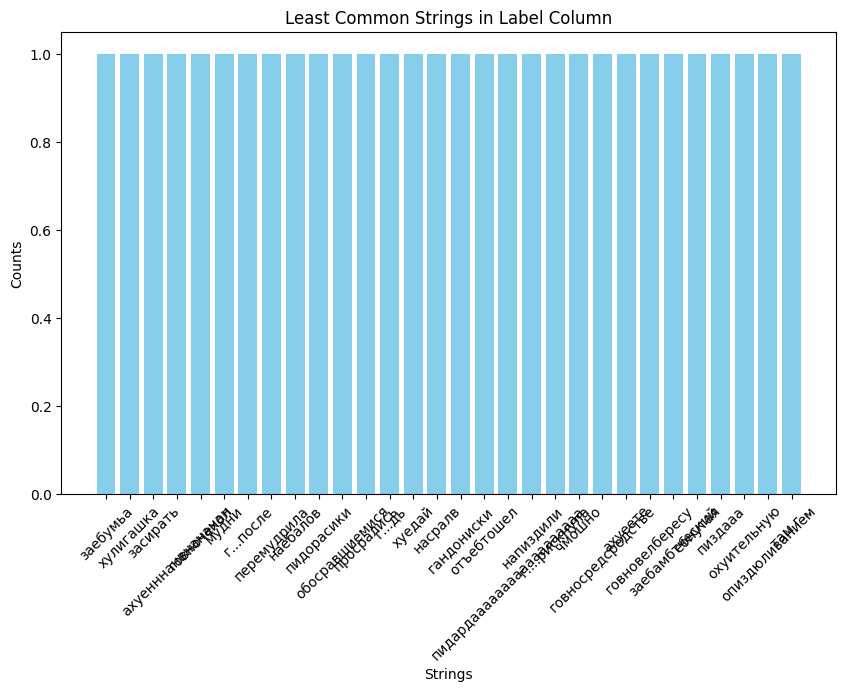

In [23]:
label_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False).tail(30)

# Plot the most common labels
plt.figure(figsize=(10, 6))
plt.bar(label_df["Label"], label_df["Count"], color='skyblue')
plt.title("Least Common Strings in Label Column")
plt.xlabel("Strings")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

In [30]:
filtered_df = df[df["label"].apply(lambda x: len(x)) >= 2]
filtered_df

,text,label,words
ID,,,
36,спасибо за уёбищние шарики!такой хуйни я еще н...,"[уёбищние, хуйни]","[спасибо, за, уёбищние, шарики!такой, хуйни, я..."
88,всегда грызем длинные цельные трахеи. у меня а...,"[оттрах, трах]","[всегда, грызем, длинные, цельные, трахеи., у,..."
131,"хуйня ебаная, пытался хуй в кольцо сунуть оно ...","[залупа, ебаная, хуйня]","[хуйня, ебаная, пытался, хуй, в, кольцо, сунут..."
262,ну вы серьезно продаете почти за полторы тыщи ...,"[говно, высер, говн]","[ну, вы, серьезно, продаете, почти, за, полтор..."
280,"брала год назад , бывало лопались , когда натя...","[г...., г...]","[брала, год, назад, бывало, лопались, когда, н..."
...,...,...,...
248012,Вы уроды в самый отвественвй момент ваша срана...,"[ ганожуи, говно]","[вы, уроды, в, самый, отвественвй, момент, ваш..."
248051,"пиздатые ногти,продавец ахуенный 😍","[продавец ахуенный, пиздатые ногти]","[пиздатые, ногти, продавец, ахуенный, 😍]"
248057,Утром забрала витамины. Сразу дала щенку!(щено...,"[обос.... ан, г]","[утром, забрала, витамины., сразу, дала, щенку..."


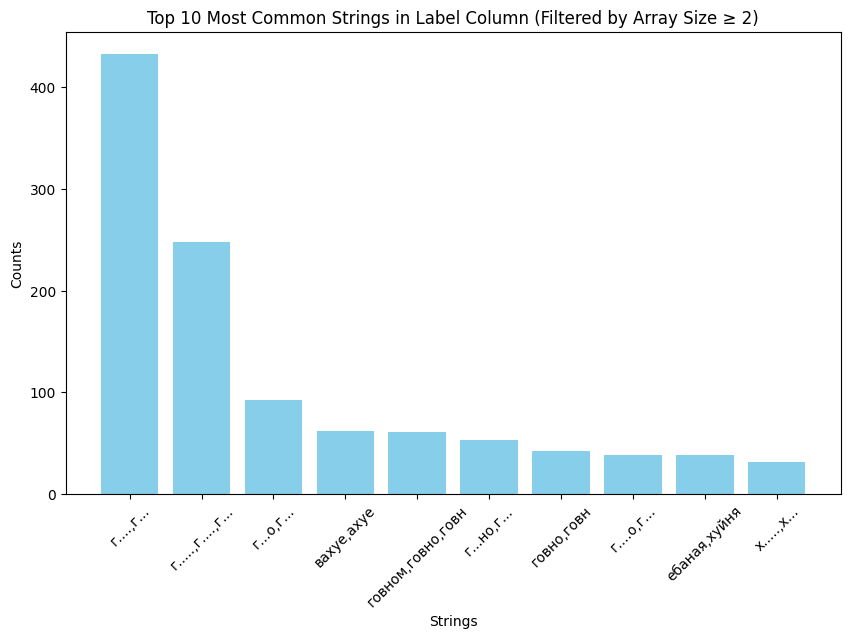

In [32]:
all_labels = [",".join(sublist) for sublist in filtered_df["label"]]
label_counts = Counter(all_labels)

# Convert to a DataFrame and select top 10
label_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False).head(10)

# Plot the top 10 most common labels
plt.figure(figsize=(10, 6))
plt.bar(label_df["Label"], label_df["Count"], color='skyblue')
plt.title("Top 10 Most Common Strings in Label Column (Filtered by Array Size ≥ 2)")
plt.xlabel("Strings")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

Нет, давайте поступим не так.
Мы будем отмечать СИМВОЛ, как матерный, или нет.
И тогда, если они идут подряд, совмещать их в один

In [41]:
def preprocess_text(text):
    """
    Preprocess text to retain only alphabetic characters and convert to lowercase.
    
    Parameters:
        text (str): Input string.
        
    Returns:
        str: Preprocessed string.
    """
    text = re.sub(r"\s+", " ", text).strip()
    text = text.lower()
    return text


def all_preprocessing(df):
    df['text'] = df['text'].apply(preprocess_text)
    df['label'] = df['label'].apply(lambda x:  str(x).split(','))
    return df

In [42]:
df = pd.read_csv('/kaggle/input/wildberries-winter-school-24-contest-detected/train.csv', index_col='ID')
df = all_preprocessing(df)
df

,text,label
ID,,
0,"брюки отличные, качественные, но к сожалению к...",[nan]
1,"отличный аппарат, в комплекте кабель и работет...",[nan]
2,супер 👍 спасибо большое,[nan]
3,получил быстро данные наушники! к наушникам пр...,[nan]
4,всё дошло в целости и сохранности),[nan]
...,...,...
248088,мне ее порвали суки,[суки]
248089,"полное дерьмо, удалите этот товар и заблокируй...",[дерьмо]
248090,херня. деньги на ветер.,[херня]


In [43]:
def add_new_labels(row):
    mask = [0] * len(row["text"])

    for substring in row["label"]:
        # Find all occurrences of the substring in the text
        start_idx = row["text"].find(substring)
        while start_idx != -1:
            # Mark corresponding indices as 1 in the mask
            for i in range(start_idx, start_idx + len(substring)):
                if i < len(mask):  # Ensure index doesn't go out of bounds
                    mask[i] = 1
            # Look for the next occurrence
            start_idx = row["text"].find(substring, start_idx + 1)
    return mask

df["new_label"] = df.apply(add_new_labels, axis=1)

# Display the resulting DataFrame
df

,text,label,new_label
ID,,,
0,"брюки отличные, качественные, но к сожалению к...",[nan],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"отличный аппарат, в комплекте кабель и работет...",[nan],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,супер 👍 спасибо большое,[nan],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,получил быстро данные наушники! к наушникам пр...,[nan],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,всё дошло в целости и сохранности),[nan],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
248088,мне ее порвали суки,[суки],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
248089,"полное дерьмо, удалите этот товар и заблокируй...",[дерьмо],"[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ..."
248090,херня. деньги на ветер.,[херня],"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [46]:
df.loc[248089, :]

text         полное дерьмо, удалите этот товар и заблокируй...
label                                                 [дерьмо]
new_label    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ...
Name: 248089, dtype: object

In [47]:
df['label'] = df['new_label']
df = df.drop(columns='new_label')

In [48]:
df

,text,label
ID,,
0,"брюки отличные, качественные, но к сожалению к...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"отличный аппарат, в комплекте кабель и работет...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,супер 👍 спасибо большое,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,получил быстро данные наушники! к наушникам пр...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,всё дошло в целости и сохранности),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
248088,мне ее порвали суки,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
248089,"полное дерьмо, удалите этот товар и заблокируй...","[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, ..."
248090,херня. деньги на ветер.,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [50]:
df.to_csv('/kaggle/working/wb_contest_2_new_dataset.csv')